In [1]:
using Turing
using DataFrames
using CSV
using Random
using Distributions
using StatisticalRethinking
using StatisticalRethinking: link
using StatisticalRethinkingPlots
using StatsPlots
using StatsBase
using Logging
using LinearAlgebra

default(label=false);
Logging.disable_logging(Logging.Warn);

# 14.1 Varying slopes by construction

Code 14.1

In [2]:
a = 3.5    # average morning wait time
b = -1     # average difference afternoon wait time
σ_a = 1    # std dev in intercepts
σ_b = 0.5  # std dev in slopes
ρ = -0.7;  # correlation between intercepts and slopes

Code 14.2

In [3]:
μ = [a, b];

Code 14.3

In [4]:
cov_ab = σ_a * σ_b * ρ
Σ = [[σ_a^2, cov_ab] [cov_ab, σ_b^2]]

2×2 Matrix{Float64}:
  1.0   -0.35
 -0.35   0.25

Code 14.4

Julia has similar "column-first" matix order

In [5]:
reshape(1:4, (2,2))

2×2 reshape(::UnitRange{Int64}, 2, 2) with eltype Int64:
 1  3
 2  4

Code 14.5

In [6]:
sigmas = [σ_a, σ_b]
Ρ = [[1, ρ] [ρ, 1]]
Σ = Diagonal(sigmas) * Ρ * Diagonal(sigmas);

Code 14.6

In [7]:
N_cafes = 20;

Code 14.7

In [8]:
Random.seed!(5)
vary_effect = rand(MvNormal(μ, Σ), N_cafes);

Code 14.8

In [9]:
a_cafe = vary_effect[1,:]
b_cafe = vary_effect[2,:];

Code 14.9

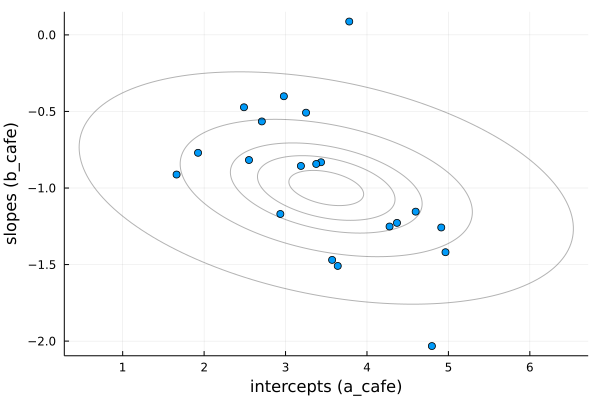

In [10]:
p = scatter(a_cafe, b_cafe, xlab="intercepts (a_cafe)", ylab="slopes (b_cafe)")

d = acos(Σ[1,2])
chi = Chisq(2)

for l ∈ (0.1, 0.3, 0.5, 0.8, 0.99)
    scale = sqrt(quantile(chi, l))
    xₜ(t) = scale*Σ[1,1]*cos(t + d/2) + μ[1]
    yₜ(t) = scale*Σ[2,2]*cos(t - d/2) + μ[2]

    plot!(xₜ, yₜ, 0, 2π, c=:black, alpha=0.3)
end
p

Code 14.10

In [11]:
Random.seed!(22)
N_visits = 10

afternoon = repeat(0:1, N_visits*N_cafes ÷ 2)
cafe_id = repeat(1:N_cafes, inner=N_visits)
μ = a_cafe[cafe_id] + b_cafe[cafe_id] .* afternoon
σ = 0.5
wait = rand.(Normal.(μ, σ))
d = DataFrame(cafe=cafe_id, afternoon=afternoon, wait=wait);

Code 14.11

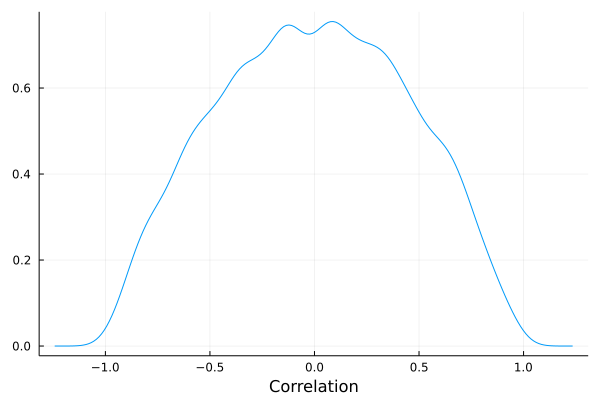

In [12]:
R = rand(LKJ(2, 2), 10^4);
density(getindex.(R, 2), xlab="Correlation")